In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from models import BayesianNetwork
from losses import negative_log_likelihood
from tensorflow.keras.optimizers import Adam

In [2]:
def target_function(x: np.ndarray) -> np.ndarray:
    return - 10 * x**3

n_samples = 500

x_target = np.linspace(-1.2, 1.2, 100)
y_target = target_function(x_target)

x_train = np.linspace(-0.8, 0.8, 50)
y_train = target_function(x_train)
y_train += 2.0 * (np.random.random(y_train.shape) - 0.5)

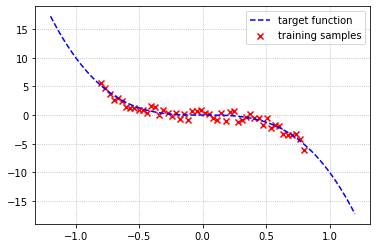

In [3]:
plt.plot(x_target, y_target, c='b', linestyle='--')
plt.scatter(x_train, y_train, marker='x', c='red')
plt.grid(True, linestyle=':')
plt.legend(['target function', 'training samples'])

In [4]:
num_batches = len(x_train)
pi = 0.8
sigma_1 = 1.8
sigma_2 = 0.05

In [5]:
model = BayesianNetwork(num_batches, pi, sigma_1, sigma_2)
model.compile(loss=negative_log_likelihood, optimizer=Adam(0.1), metrics=['mse'])
hist = model.fit(x_train, y_train, batch_size=len(x_train), epochs=2500, shuffle=True, verbose=0)

In [6]:
x_pred = tf.convert_to_tensor(np.linspace(-1.2, 1.2, 100).reshape(-1, 1), dtype=tf.float32)
y_preds = tf.stack([model(x_pred) for i in range(50)])
x_pred = x_pred[:,0]
y_pred_mu = tf.reduce_mean(y_preds, axis=0)[:,0]
y_pred_std = tf.math.reduce_std(y_preds, axis=0)[:,0]

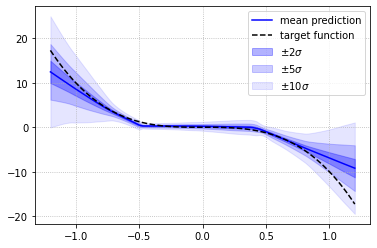

In [11]:
plt.plot(x_pred, y_pred_mu, c='blue')

plt.fill_between(x_pred, y_pred_mu + 2 * y_pred_std, y_pred_mu - 2 * y_pred_std, 
                 alpha=0.3, label='Epistemic uncertainty', color='blue')
plt.fill_between(x_pred, y_pred_mu + 5 * y_pred_std, y_pred_mu - 5 * y_pred_std, 
                 alpha=0.2, label='Epistemic uncertainty', color='blue')
plt.fill_between(x_pred, y_pred_mu + 10 * y_pred_std, y_pred_mu - 10 * y_pred_std, 
                 alpha=0.1, label='Epistemic uncertainty', color='blue')

plt.plot(x_target, y_target, c='black', linestyle='--')
plt.legend(['mean prediction','target function', '$\pm 2 \sigma$', '$\pm 5 \sigma$', '$\pm 10 \sigma$'])
plt.grid(True, linestyle=':')

plt.savefig('uncertainty.png')